**BEAUTIFUL SOUP (WEB SCRAPPING)**

In [ ]:
from bs4 import BeautifulSoup
# BeautifulSoup is used to parse the HTML and find elements like:
# headings
# paragraphs
# links
# tables
# prices, names, etc.
with open("index.html","r") as f:
    soup=BeautifulSoup(f,"html.parser")
    print(soup.prettify())
    print(type(soup))

# When you use both:

# requests → fetch page

# BeautifulSoup → extract required data

# That process is called web scraping.

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Document
  </title>
 </head>
 <body>
  <div class="my">
  </div>
  <ul>
   <li>
    physic
   </li>
   <li>
    Math
   </li>
   <li>
    Chemistry
   </li>
  </ul>
 </body>
</html>

<class 'bs4.BeautifulSoup'>


In [8]:
data=soup.find_all("li")
print(data)
print(type(data))
for value in data:
    print(value.text)

[<li>physic</li>, <li>Math</li>, <li>Chemistry</li>]
<class 'bs4.element.ResultSet'>
physic
Math
Chemistry


In [37]:
import requests
from pprint import pprint
# When we send a request to a normal webpage URL, the server returns HTML, not JSON. Since response.json() 
# expects JSON data, it raises an error. We should use response.text and parse it with BeautifulSoup. 
# response.json() works only when the response is from an API endpoint that returns JSON.
url="https://ekantipur.com"
response=requests.get(url)
print(response.headers["Content-Type"])
if response.status_code==200:
    data=response.text
    soup=BeautifulSoup(data,"html.parser")
    print(soup.prettify())
else:
    print(f"Response {response.status_code}")

text/html; charset=UTF-8
<!DOCTYPE html>
<html lang="ne">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Kantipur Daily is Nepal's no 1 Nepali news portal and Kantipur Daily's official website. This delivers the latest breaking news and information on latest top stories, national, international, politics, sports, business, finance, entertainment, photo-gallery, audio, video and more." name="description"/>
  <meta content="Nepal News, Online News from Nepal, Nepali News, Political, Science, Social, Sport, Ecomony, Business,Entertainment, Nepali Movie, Songs, Nepali Model, Actor,Audio, Video, Interview, Nepali Filmi News, Poems, Business news, Views, Reviews" name="keyword"/>
  <meta content="index, follow" name="robots"/>
  <meta content="Nepali" name="language"/>
  <meta content="" name="reply-to"/>
  <meta content="1 day" name="revisit-after"/>
  <meta content="https://assets-cdn.

In [38]:
news=soup.find_all("h2")
final_data=[]
import pandas as pd
for new in news:
    text_data=new.text
    link_data=new.find("a")
    if link_data:
        link=link_data("href")
    if len(text_data)>20:
        final_data.append({"headline":text_data,
                           "link":link})
    print(text_data,link)
    print(new.find("a"))
df=pd.DataFrame(final_data)
df.to_csv("news.csv",index=False)

काभ्रेमा दलका उम्मेदवारलाई स्वतन्त्रको टक्कर []
<a data-type="title" href="https://ekantipur.com/politics/2026/01/27/independents-compete-with-party-candidates-21-52.html" onclick="gaEvent('Kantipur Top News','Clicked','काभ्रेमा दलका उम्मेदवारलाई स्वतन्त्रको टक्कर')">काभ्रेमा दलका उम्मेदवारलाई स्वतन्त्रको टक्कर</a>
मधेशका ३२ सिट : पुराना दलको बर्चस्व कि नयाँको उदय? []
<a data-type="title" href="https://ekantipur.com/politics/2026/01/27/32-seats-in-madhesh-dominance-of-old-parties-or-rise-of-new-ones-57-42.html" onclick="gaEvent('Kantipur Top News','Clicked','मधेशका ३२ सिट : पुराना दलको बर्चस्व कि नयाँको उदय?')">मधेशका ३२ सिट : पुराना दलको बर्चस्व कि नयाँको उदय?</a>
इराकमा कम्पनीमा काम गर्नेलाई श्रम स्वीकृति, घरेलु श्रमिकलाई छैन []
<a data-type="title" href="https://ekantipur.com/news/2026/01/27/work-permits-for-domestic-workers-going-to-iraq-suspended-39-17.html" onclick="gaEvent('Kantipur Top News','Clicked','इराकमा कम्पनीमा काम गर्नेलाई श्रम स्वीकृति, घरेलु श्रमिकलाई छैन')">इराकमा कम

In [ ]:
import pandas as pd
from random import random
data_list=[]
for i in range(1,100001):
    data_list.append({
        "roll":i,
        "name":f"user{i}",
        "salary":100000*random()
    })
df=pd.DataFrame(data_list)
df.to_csv("biG_file.csv",index=False)
df.head()

,roll,name,salary
0,1,user1,6056.037013
1,2,user2,46528.539422
2,3,user3,24098.081226
3,4,user4,22373.638645
4,5,user5,87998.781985


In [ ]:
filename="biG_file.csv"
output_file="out.csv"
firstChunk=True
for chunk in pd.read_csv(filename,chunksize=10000):
    chunk["Gender"]=chunk["name"].apply(lambda x:"female" if x=="AssertionErrorLaxmi" else "male")
    print(chunk.head(1))

   roll   name       salary Gender
0     1  user1  6056.037013   male
        roll       name        salary Gender
10000  10001  user10001  47680.913052   male
        roll       name        salary Gender
20000  20001  user20001  74961.119004   male
        roll       name        salary Gender
30000  30001  user30001  39186.211649   male
        roll       name        salary Gender
40000  40001  user40001  99022.684671   male
        roll       name        salary Gender
50000  50001  user50001  76843.380318   male
        roll       name        salary Gender
60000  60001  user60001  76713.779642   male
        roll       name        salary Gender
70000  70001  user70001  93565.197029   male
        roll       name        salary Gender
80000  80001  user80001  95221.995261   male
        roll       name        salary Gender
90000  90001  user90001  59117.286675   male


In [25]:
import csv

with open("largedataset.csv", mode="w", newline="") as f:
    writer = csv.writer(f)


    writer.writerow(["id", "name", "age", "salary"])

    for i in range(1, 50001):
        writer.writerow([
            i,
            f"User{i}",
            20 + i % 40,
            30000 + i % 5000
        ])


In [24]:
import pandas as pd
data={
    "Name":['Ram','syham','vishnu'],
    'Age':[29,39,12]
}
df=pd.DataFrame(data)
df.head()

,Name,Age
0,Ram,29
1,syham,39
2,vishnu,12


,Name,Age,gender
0,Ram,29,Male
1,syham,39,Male
2,vishnu,12,Male


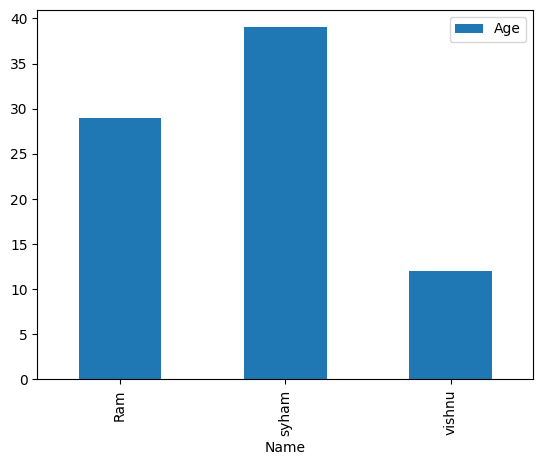

In [28]:
import matplotlib.pyplot as plt
df["gender"]=df["Name"].apply(lambda x:"Female" if x=="Laxmi" else "Male")
df.plot.bar(x="Name",y="Age")
df.head()

In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://example.com"
html = requests.get(url).text

soup = BeautifulSoup(html, "html.parser")
print(soup.prettify())

for link in soup.find_all("a"):
    print(link.get("href"))


<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Example Domain
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <style>
   body{background:#eee;width:60vw;margin:15vh auto;font-family:system-ui,sans-serif}h1{font-size:1.5em}div{opacity:0.8}a:link,a:visited{color:#348}
  </style>
  <body>
   <div>
    <h1>
     Example Domain
    </h1>
    <p>
     This domain is for use in documentation examples without needing permission. Avoid use in operations.
     <p>
      <a href="https://iana.org/domains/example">
       Learn more
      </a>
     </p>
    </p>
   </div>
  </body>
 </head>
</html>

https://iana.org/domains/example


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://google.com"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
# This parser:

# Reads HTML text

# Builds a DOM-like tree

# Lets you search and extract elements

# 👉 Goal: read data, not render UI

with open("a.html", "w", encoding="utf-8") as f:
    f.write(soup.prettify())


In [32]:
url = "https://google.com"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
links=soup.find_all("a")
print(type(links))
for link in links:
    print(link.get("href"))


<class 'bs4.element.ResultSet'>
https://www.google.com/imghp?hl=ne&tab=wi
https://maps.google.com.np/maps?hl=ne&tab=wl
https://play.google.com/?hl=ne&tab=w8
https://news.google.com/?tab=wn
https://mail.google.com/mail/?tab=wm
https://drive.google.com/?tab=wo
https://calendar.google.com/calendar?tab=wc
https://www.google.com.np/intl/en/about/products?tab=wh
http://www.google.com.np/history/optout?hl=ne
/preferences?hl=ne
https://accounts.google.com/ServiceLogin?hl=ne&passive=true&continue=https://www.google.com/&ec=GAZAAQ
/advanced_search?hl=ne&authuser=0
https://www.google.com/setprefs?sig=0_XBI5PbRUZwfnn-PIkdN9VcGohNs%3D&hl=en&source=homepage&sa=X&ved=0ahUKEwifnvubmqySAxXG1zgGHQWTOG4Q2ZgBCAY
/intl/ne/ads/
/intl/ne/about.html
https://www.google.com/setprefdomain?prefdom=NP&prev=https://www.google.com.np/&sig=K_s3k6wXzG8hSKN9RwXnMII6kBdpc%3D


In [45]:
finds = soup.find_all("div")

data = []

for div in finds:
    find_link = div.find("a")
    find_form = div.find("form")
    find_table = div.find("table")

    data.append({
        "link": find_link,
        "form": find_form,
        "table": find_table
    })

    print(find_link, find_form, find_table)
    print(div.find("input"))
df=pd.DataFrame(data)
df.to_csv("Finald.csv",index=False)


<a class="link" onclick="hide('roadblock-ad')">कान्तिपुर वेबसाईट <i class="icon-arrow-r"></i> </a> None None
None
<a class="link" onclick="hide('roadblock-ad')">कान्तिपुर वेबसाईट <i class="icon-arrow-r"></i> </a> None None
None
<a href="https://kantipurevents.com/kantipur-conclave/kantipur-conclave-2026" onclick="hide('roadblock-ad')" target="_blank"><div class="rb_image"><img alt="Advertisement" src="https://assets-cdn.ekantipur.com/uploads/source/ads/conclave-desk-2512026012206.jpg"/></div></a> None None
None
None None None
None
<a class="button secondary" onclick="Auth.do_fb_login();" style="cursor:pointer"><i class="icon-facebook"></i> <div class="signupWithFacebookText"> फेसबुकबाट साइन अप</div></a> <form class="formPanel" id="frm-alert-signup"><div class="mainTitle"><img alt="" src="https://jcss-cdn.ekantipur.com/kantipurdaily/images/publication.png"/><span class="kantipurNetworkText">कान्तिपुर नेटवर्क</span><span class="signupText">साइन अप</span></div><a class="button secondary" 